# Exploring the senegalese tax-benefit-system with OpenFisca

In [1]:
!pip install matplotlib
!pip install openfisca-senegal[survey]

In [1]:
import matplotlib.pyplot as plt  # For graphics
%matplotlib inline

from openfisca_core import periods

from openfisca_senegal import CountryTaxBenefitSystem as SenegalTaxBenefitSystem  # The Senegalese tax-benefits system
from openfisca_senegal.scenarios import init_single_entity

%config Completer.use_jedi = False


## The concepts

### Tax Benefit System

In [3]:
tax_benefit_system = SenegalTaxBenefitSystem()

### Entities

In [4]:
tax_benefit_system.entities

In [5]:
[entity.key for entity in tax_benefit_system.entities]

['household', 'person']

In [ ]:
tax_benefit_system.entities

### Variables 

In [6]:
tax_benefit_system.variables

{'household_weight': <139642063039984_206566494876397543_weights.household_weight at 0x7f01384e43d0>,
 'person_weight': <139642063039984_206566494876397543_weights.person_weight at 0x7f01384dfcd0>,
 'benefices_non_salarie': <139642063039984_-2412660436492857885_revenus.benefices_non_salarie at 0x7f01384e40d0>,
 'conjoint_a_des_revenus': <139642063039984_-2412660436492857885_revenus.conjoint_a_des_revenus at 0x7f01384d9220>,
 'pension_retraite': <139642063039984_-2412660436492857885_revenus.pension_retraite at 0x7f01384d9a90>,
 'salaire': <139642063039984_-2412660436492857885_revenus.salaire at 0x7f00f3902e20>,
 'age': <139642063039984_5151405515462789447_caracteristiques_socio_demographiques.age at 0x7f00f3902f70>,
 'date_naissance': <139642063039984_5151405515462789447_caracteristiques_socio_demographiques.date_naissance at 0x7f00f3902f10>,
 'est_celibataire': <139642063039984_5151405515462789447_caracteristiques_socio_demographiques.est_celibataire at 0x7f00f3902fd0>,
 'est_divorce':

In [7]:
sorted(tax_benefit_system.variables.keys())

['age',
 'benefices_non_salarie',
 'conjoint_a_des_revenus',
 'date_naissance',
 'est_celibataire',
 'est_divorce',
 'est_marie',
 'est_veuf',
 'household_weight',
 'impot_avant_reduction_famille',
 'impot_revenus',
 'impots_indirects',
 'nombre_de_parts',
 'nombre_enfants',
 'pension_retraite',
 'person_weight',
 'reduction_impots_pour_charge_famille',
 'salaire',
 'statut_marital']

In [8]:
import inspect
for name, variable in sorted(tax_benefit_system.variables.items()):
    print(name)
    if not variable.is_input_variable():
        formula = variable.get_formula('2017')
        source_code = inspect.getsourcelines(formula)[0]
        print(''.join(source_code))
    print('')

age
    def formula(individu, period, parameters):
        date_naissance = individu('date_naissance', period)
        birth_year = date_naissance.astype('datetime64[Y]').astype(int) + 1970
        birth_month = date_naissance.astype('datetime64[M]').astype(int) % 12 + 1
        birth_day = (date_naissance - date_naissance.astype('datetime64[M]') + 1).astype(int)

        is_birthday_past = (
            (birth_month < period.start.month) + (birth_month == period.start.month) * (birth_day <= period.start.day)
            )
        # If the birthday is not passed this year, subtract one year
        return (period.start.year - birth_year) - where(is_birthday_past, 0, 1)


benefices_non_salarie

conjoint_a_des_revenus

date_naissance

est_celibataire
    def formula(individu, period):
        return individu('statut_marital', period) == TypesStatutMarital.celibataire


est_divorce
    def formula(individu, period):
        return individu('statut_marital', period) == TypesStatutMarital.v

### Parameters

In [9]:
print(tax_benefit_system.parameters)

nombre_de_parts:
  limite_max:
    2013-01-01: 5
  par_enfant:
    2013-01-01: 0.5
  repartition_marie_conjoint:
    2013-01-01: 0.5
  veuf_avec_enfant:
    2013-01-01: 0.5
prelevements_obligatoires:
  impots_directs:
    bareme_impot_progressif:
      brackets:
        - rate:
            2013-01-01: 0.0
          threshold:
            2013-01-01: 0.0
        - rate:
            2013-01-01: 0.2
          threshold:
            2013-01-01: 630000.0
        - rate:
            2013-01-01: 0.3
          threshold:
            2013-01-01: 1500000.0
        - rate:
            2013-01-01: 0.35
          threshold:
            2013-01-01: 4000000.0
        - rate:
            2013-01-01: 0.37
          threshold:
            2013-01-01: 8000000.0
        - rate:
            2013-01-01: 0.4
          threshold:
            2013-01-01: 13500000.0
    reductions_pour_charge_de_famille:
      max_1:
        2013-01-01: 0.0
      max_2:
        2013-01-01: 300000.0
      max_3:
        2013-01-

In [10]:
parameters = tax_benefit_system.parameters(2017)
parameters

nombre_de_parts:
  repartition_marie_conjoint:
    0.5
  veuf_avec_enfant:
    0.5
  limite_max:
    5
  par_enfant:
    0.5
prelevements_obligatoires:
  impots_indirects:
    tva:
      taux_normal:
        0.18
      taux_reduit:
        0.1
    droits_douane:
      exonere:
        0
      equipements:
        0.05
      consommation_intermediaire:
        0.1
      consommation_finale:
        0.2
      biens_specifiques:
        0.35
      redevance_statistique:
        0.01
      prelevement_communautaire_de_solidarite:
        0.01
  impots_directs:
    bareme_impot_progressif:
        - threshold: 0.0
          rate: 0.0
        - threshold: 630000.0
          rate: 0.2
        - threshold: 1500000.0
          rate: 0.3
        - threshold: 4000000.0
          rate: 0.35
        - threshold: 8000000.0
          rate: 0.37
        - threshold: 13500000.0
          rate: 0.4
    reductions_pour_charge_de_famille:
      taux_5:
        0.25
      taux_2:
        0.1
      max_8:
 

In [15]:
tax_benefit_system.parameters.prelevements_obligatoires.impots_directs.bareme_impot_progressif(2016)

  - threshold: 0.0
    rate: 0.0
  - threshold: 630000.0
    rate: 0.2
  - threshold: 1500000.0
    rate: 0.3
  - threshold: 4000000.0
    rate: 0.35
  - threshold: 8000000.0
    rate: 0.37
  - threshold: 13500000.0
    rate: 0.4

## A simple test case scenario

### Basics

In [16]:
scenario = tax_benefit_system.new_scenario()
scenario

<openfisca_core.taxbenefitsystems.tax_benefit_system.TaxBenefitSystem.new_scenario.<locals>.ScenarioAdapter at 0x7f00f39029a0>

In [17]:
init_single_entity(
    scenario,
    parent1 = {
        'salaire': 2800000,
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 1,
        },
    period = '2017',
    )

<openfisca_core.taxbenefitsystems.tax_benefit_system.TaxBenefitSystem.new_scenario.<locals>.ScenarioAdapter at 0x7f00f39029a0>

In [18]:
simulation = scenario.new_simulation()

In [19]:
simulation.calculate('salaire', period = '2017')

array([2800000.], dtype=float32)

In [20]:
simulation.calculate('impot_revenus', period = '2017')

array([11700.], dtype=float32)

### Application: a simple function to compute the tax gain for having a child

In [25]:
def tax_gain(salaire = 0, est_marie = False, conjoint_a_des_revenus = False, 
             nombre_enfants = 0):
    period = '2017'
    parent1_before = {
        'salaire': salaire,
        'est_marie': est_marie,
        'conjoint_a_des_revenus': conjoint_a_des_revenus,
        'nombre_enfants': nombre_enfants,
        }
    simulation_before = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_before,
        period = period,
        ).new_simulation()
    parent1_after = parent1_before.copy()
    parent1_after['nombre_enfants'] += 1
    simulation_after = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_after,
        period = period,
        ).new_simulation()
    tax_increase = simulation_after.calculate('impot_revenus', period) - simulation_before.calculate('impot_revenus', period)
    return - tax_increase
                                                                                            

In [26]:
tax_gain(salaire = 2800000)

array([100000.], dtype=float32)

In [27]:
tax_gain(salaire = 2800000, nombre_enfants = 2)

array([100000.], dtype=float32)

In [28]:
[tax_gain(salaire = 2800000, nombre_enfants = n) for n in range(8)]

[array([100000.], dtype=float32),
 array([100000.], dtype=float32),
 array([100000.], dtype=float32),
 array([11700.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32),
 array([-0.], dtype=float32)]

## More complex scenario: varying revenue 

### Basics

In [29]:
year = 2017
simulation = init_single_entity(
    tax_benefit_system.new_scenario(),
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [[
        {
            'count': 100,
            'min': 0,
            'max': 15e6,
            'name': 'salaire',
            }
        ]],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
reduction_impots_pour_charge_famille = simulation.calculate('reduction_impots_pour_charge_famille', period = year)
impot_avant_reduction_famille = simulation.calculate('impot_avant_reduction_famille', period = year)
impot_revenus = simulation.calculate('impot_revenus', period = year)

In [31]:
len(reduction_impots_pour_charge_famille)

100

Text(0.5, 1.0, '0 enfants')

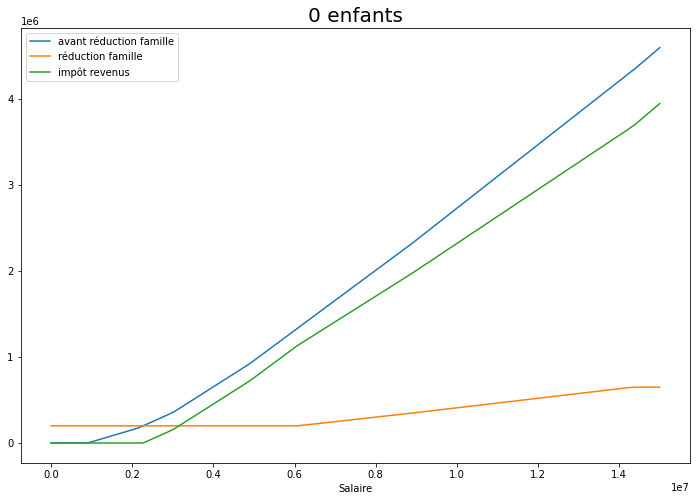

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(salaire, impot_avant_reduction_famille, label='avant réduction famille')
plt.plot(salaire, reduction_impots_pour_charge_famille, label='réduction famille')
plt.plot(salaire, impot_revenus, label='impôt revenus')
plt.xlabel('Salaire')
plt.legend()
plt.title('0 enfants', fontsize=20)

### Application: by how much the tax gain for having a child varies with revenue

#### Write the function `tax_gain_varying_revenue` that computes the gain of having a child as a function of the revenue

In [42]:

tax_increase


array([      0.,       0.,       0.,       0.,       0.,       0.,
         -1200.,  -22400.,  -43600.,  -64800.,  -86000., -100000.,
       -100000., -100000., -100000., -100000., -100000., -100000.,
       -100000., -100000., -100000., -100000., -100000., -100000.,
       -100000., -100000., -100000., -100000., -100000., -100000.,
       -100000., -100000., -100000., -100000., -101185., -106505.,
       -111790., -117110., -122395., -127715., -133000., -138320.,
       -143605., -148925., -154210., -159530., -164815., -170135.,
       -175420., -180740., -186025., -191345., -196630., -201950.,
       -207235., -212555., -217840., -223160., -228445., -233843.,
       -239430., -245054., -250641., -256265., -261852., -267476.,
       -273100., -278687., -284311., -289898., -295522., -300000.,
       -300000., -300000., -300000., -300000., -300000., -300000.,
       -300000., -300000., -300000., -300000., -300000., -300000.,
       -300000., -300000., -300000., -300000., -300000., -3000

In [43]:
def tax_gain_varying_revenue(max_salaire = 0, est_marie = False, conjoint_a_des_revenus = False, 
                             nombre_enfants = 0):
    period = '2017'
    parent1_before = {
        'est_marie': est_marie,
        'conjoint_a_des_revenus': conjoint_a_des_revenus,
        'nombre_enfants': nombre_enfants,
        }
    axes = [[
            {
                'count': 100,
                'min': 0,
                'max': max_salaire,
                'name': 'salaire',
                }
            ]]
    simulation_before = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_before,
        axes = axes,
        period = period,
        ).new_simulation()
    salaire = simulation_before.calculate('salaire', period)
    parent1_after = parent1_before.copy()
    parent1_after['nombre_enfants'] += 1
    simulation_after = init_single_entity(
        tax_benefit_system.new_scenario(),
        parent1 = parent1_after,
        period = period,
        axes = axes,
        ).new_simulation()
    tax_increase = simulation_after.calculate('impot_revenus', period) - simulation_before.calculate('impot_revenus', period)

    return salaire, -tax_increase

In [48]:
salaire, gain = tax_gain_varying_revenue(max_salaire = 15e6)

In [49]:
gain

array([    -0.,     -0.,     -0.,     -0.,     -0.,     -0.,   1200.,
        22400.,  43600.,  64800.,  86000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000., 101185.,
       106505., 111790., 117110., 122395., 127715., 133000., 138320.,
       143605., 148925., 154210., 159530., 164815., 170135., 175420.,
       180740., 186025., 191345., 196630., 201950., 207235., 212555.,
       217840., 223160., 228445., 233843., 239430., 245054., 250641.,
       256265., 261852., 267476., 273100., 278687., 284311., 289898.,
       295522., 300000., 300000., 300000., 300000., 300000., 300000.,
       300000., 300000., 300000., 300000., 300000., 300000., 300000.,
       300000., 300000., 300000., 300000., 300000., 300000., 300000.,
       300000., 300000., 300000., 300000., 300000., 300000., 300000.,
       300000., 3000

Text(0.5, 1.0, 'Gain fiscal au 1er enfant')

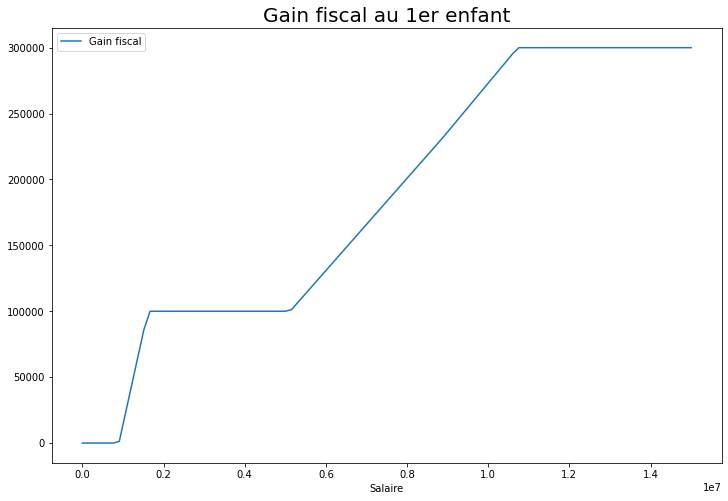

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(salaire, gain, label='Gain fiscal')
plt.xlabel('Salaire')
plt.legend()
plt.title('Gain fiscal au 1er enfant', fontsize=20)

#### Write a loop to plot the gain for several children

Text(0.5, 1.0, "Gain fiscal selon le rang de l'enfant")

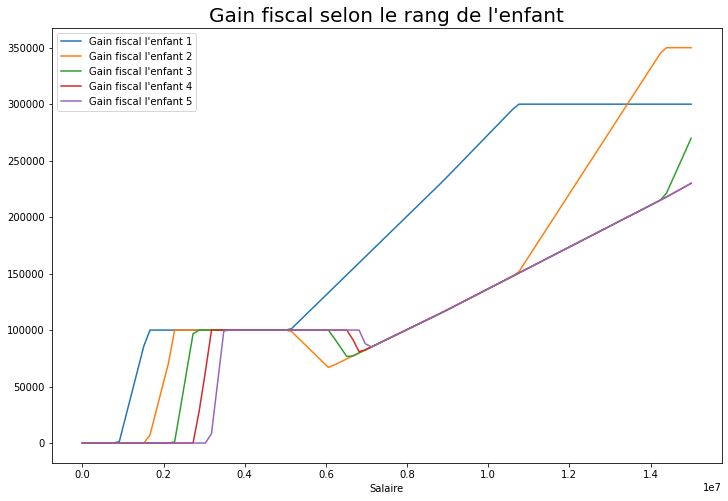

In [52]:
plt.figure(figsize=(12, 8))
for nombre_enfants in range(5):
    salaire, gain = tax_gain_varying_revenue(max_salaire = 15e6, nombre_enfants = nombre_enfants)
    plt.plot(salaire, gain, label = f"Gain fiscal l'enfant {nombre_enfants + 1}")
plt.xlabel('Salaire')
plt.legend()
plt.title("Gain fiscal selon le rang de l'enfant", fontsize=20)


## Tax rates

### Average tax rate

In [77]:
simulation = init_single_entity(
    tax_benefit_system.new_scenario(),
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [[
        {
            'count': 100,
            'min': 0,
            'max': 1e8,
            'name': 'salaire',
            }
        ]],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot = simulation.calculate('impot_revenus', period = year)

Text(0.5, 0, 'Salaire')

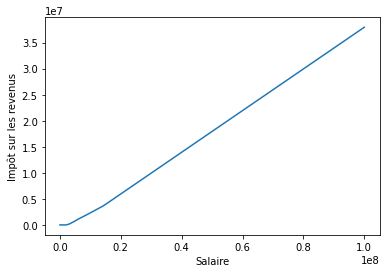

In [78]:
plt.plot(salaire, impot)
plt.ylabel(u"Impôt sur les revenus")
plt.xlabel(u"Salaire")

In [79]:
taux_moyen = impot / salaire  # Average tax rate

/tmp/ipykernel_39501/541745815.py:1: RuntimeWarning: invalid value encountered in true_divide
  taux_moyen = impot / salaire  # Average tax rate


In [80]:
taux_moyen = impot / (salaire * (salaire != 0) + (salaire == 0) )  

Text(0.5, 0, 'Salaire')

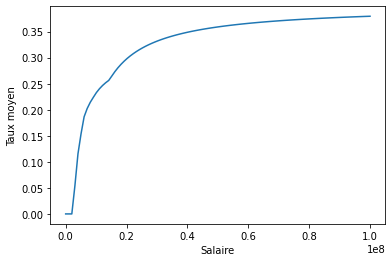

In [81]:
plt.plot(salaire, taux_moyen)
plt.ylabel("Taux moyen")
plt.xlabel("Salaire")

### Marginal tax rate

In [82]:
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire[:-1] - salaire[1:] )  # We avoid the first point

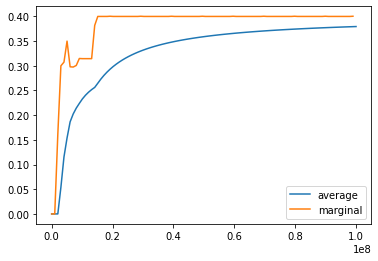

In [85]:
plt.plot(salaire, taux_moyen, label = 'average')
plt.plot(salaire[:-1], taux_marginal, label = 'marginal')
plt.legend()

#### Exercice: how marginal and average tax rate compare at infinity

### Add a new variable and use dedicated functions

Add a disposable income variable to the tax-benefit-system

In [86]:
from openfisca_core.model_api import *
from openfisca_senegal.entities import Person

tax_benefit_system = SenegalTaxBenefitSystem()

class revenu_disponible(Variable):
    definition_period = YEAR
    entity = Person
    value_type = float

    def formula(person, period):
        salaire = person('salaire', period)
        impot_revenus = person('impot_revenus', period)
        return salaire - impot_revenus


tax_benefit_system.add_variable(revenu_disponible)


In [87]:
tax_benefit_system.variables.keys()

dict_keys(['household_weight', 'person_weight', 'benefices_non_salarie', 'conjoint_a_des_revenus', 'pension_retraite', 'salaire', 'age', 'date_naissance', 'est_celibataire', 'est_divorce', 'est_marie', 'est_veuf', 'nombre_enfants', 'statut_marital', 'impots_indirects', 'impot_avant_reduction_famille', 'impot_revenus', 'nombre_de_parts', 'reduction_impots_pour_charge_famille', 'revenu_disponible'])

In [88]:
simulation = init_single_entity(
    tax_benefit_system.new_scenario(),
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = '2017',
    axes = [[
        {
            'count': 100,
            'min': 0,
            'max': 18e6,
            'name': 'salaire',
            }
        ]],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot = simulation.calculate('impot_revenus', period = year)
revenu_disponible = simulation.calculate('revenu_disponible', period = year)

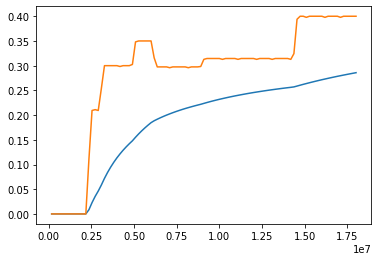

In [89]:
from openfisca_core.rates import average_rate, marginal_rate
plt.plot(salaire[1:], average_rate(revenu_disponible[1:], salaire[1:]))
plt.plot(salaire[1:], marginal_rate(revenu_disponible, salaire))

## Reforming the tax-benefit system

### Parametric reform

In [91]:
def modify_parameters(parameters):
    parameters.prelevements_obligatoires.impots_directs.bareme_impot_progressif[5].rate.update(period = period(year), value = .5)
    return parameters
    
class tax_the_rich(Reform):
    name = u"Tax last bracket at 50%"

    def apply(self):
        self.modify_parameters(modifier_function = modify_parameters)

In [94]:
reformd_tax_benefit_system = tax_the_rich(tax_benefit_system)

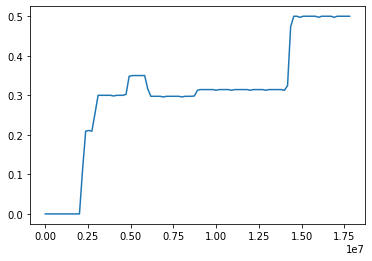

In [95]:
simulation = init_single_entity(
    reformd_tax_benefit_system.new_scenario(),
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = year,
    axes = [[
        {
            'count': 100,
            'min': 0,
            'max': 18e6,
            'name': 'salaire',
            }
        ]],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot = simulation.calculate('impot_revenus', period = year)
taux_marginal =  (impot[:-1] - impot[1:]) / (salaire[:-1] - salaire[1:] )  # We avoid the first point
plt.plot(salaire[:-1], taux_marginal)

### Structural Reform

#### Exercice: add a an amount threshold under which no tax is due

In [96]:
def build_structural_reform(seuil = 10000):    
    tax_benefit_system = SenegalTaxBenefitSystem()
    
    class impot_revenus(Variable):
        def formula(individu, period):
            # TODO rewrite a new impot_revenus wich have a non-payment threshold (seuil)
            impot_avant_reduction_famille = individu('impot_avant_reduction_famille', period)
            reduction_impots_pour_charge_famille = individu('reduction_impots_pour_charge_famille', period)
            impot_apres_reduction_famille = impot_avant_reduction_famille - reduction_impots_pour_charge_famille
            impot_revenus = max_(0, impot_apres_reduction_famille)
            return impot_revenus * (impot_revenus > seuil)

    class revenu_disponible(Variable):
        definition_period = YEAR
        entity = Person
        value_type = float

        def formula(person, period):
            salaire = person('salaire', period)
            impot_revenus = person('impot_revenus', period)
            return salaire - impot_revenus

    class structural_reform(Reform):
        name = u"Seuil de non-versement: {}".format(seuil)

        def apply(self):
            self.update_variable(impot_revenus)
            self.add_variable(revenu_disponible)

    return structural_reform(tax_benefit_system)

In [101]:
structural_reform = build_structural_reform(seuil = 100000)
simulation = init_single_entity(
    structural_reform.new_scenario(),
    parent1 = {
        'est_marie': True,
        'conjoint_a_des_revenus': False,
        'nombre_enfants': 0,
        },
    period = '2017',
    axes = [[
        {
            'count': 100,
            'min': 0,
            'max': 5e6,
            'name': 'salaire',
            }
        ]],
    ).new_simulation()
salaire = simulation.calculate('salaire', period = year)
impot_verse = simulation.calculate('impot_revenus', period = year)
revenu_disponible = simulation.calculate('revenu_disponible', period = year)

Text(0.5, 0, 'Salaire')

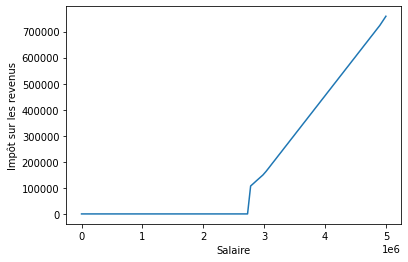

In [102]:
plt.plot(salaire, impot_verse)
plt.ylabel(u"Impôt sur les revenus")
plt.xlabel(u"Salaire")

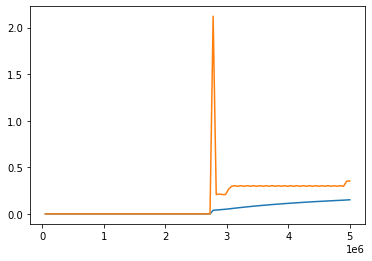

In [103]:
plt.plot(salaire[1:], average_rate(revenu_disponible[1:], salaire[1:]))
plt.plot(salaire[1:], marginal_rate(revenu_disponible, salaire))